In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import Dataset And Analysis

In [210]:
df  = pd.read_csv("Housing.csv")

In [211]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [212]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [213]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [214]:
df.shape

(545, 13)

In [215]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [216]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [217]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [218]:
categorical_columns = df.select_dtypes(include=['object'])
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
    mainroad guestroom basement hotwaterheating airconditioning prefarea  \
0        yes        no       no              no             yes      yes   
1        yes        no       no              no             yes       no   
2        yes        no      yes              no              no      yes   
3        yes        no      yes              no             yes      yes   
4        yes       yes      yes              no             yes       no   
..       ...       ...      ...             ...             ...      ...   
540      yes        no      yes              no              no       no   
541       no        no       no              no              no       no   
542      yes        no       no              no              no       no   
543       no        no       no              no              no       no   
544      yes        no       no              no              no       no   

    furnishingstatus  
0          furnished  
1          furnished

# Encoding Target Variable

In [219]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Correlation Heatmap

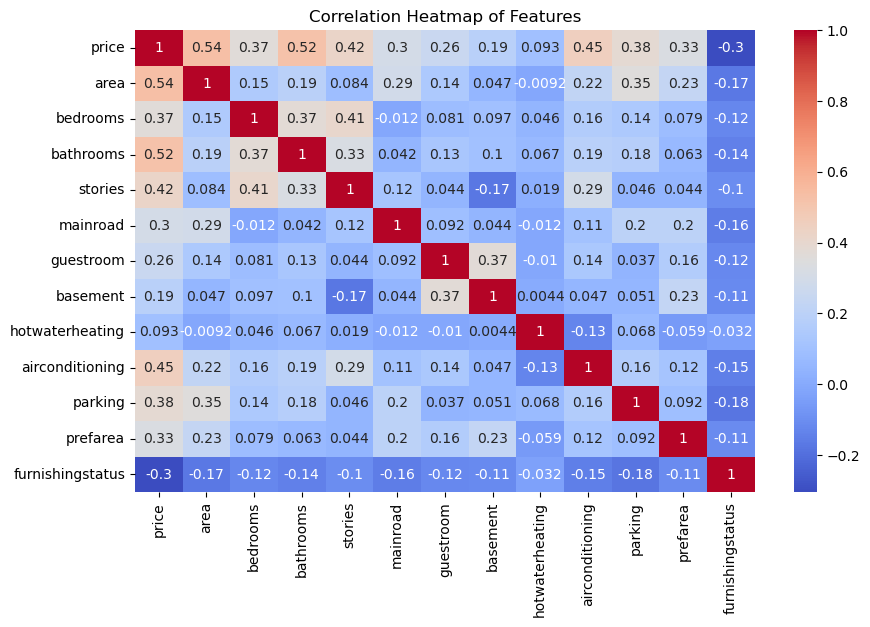

In [220]:
# Now compute correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


# Splitting Data into Training and Testing Sets

In [221]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['price'])  # Drop target column
y = df['price']

In [222]:
df.shape

(545, 13)

In [223]:
# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [224]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
(X_train)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,1,0,0,0,1,1,0,0
93,7200,3,2,1,1,0,1,0,1,3,0,1
335,3816,2,1,1,1,0,1,0,1,2,0,0
412,2610,3,1,2,1,0,1,0,0,0,1,2
471,3750,3,1,2,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,2
106,5450,4,2,1,1,0,1,0,1,0,1,1
270,4500,3,2,3,1,0,0,1,0,1,0,0
435,4040,2,1,1,1,0,0,0,0,0,0,2


In [226]:
(X_test)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,2
77,6500,3,2,3,1,0,0,0,1,0,1,0
360,4040,2,1,1,1,0,0,0,0,0,0,1
90,5000,3,1,2,1,0,0,0,1,0,0,1
493,3960,3,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,1,0,1,0,0,2,0,1
357,6930,4,1,2,0,0,0,0,0,1,0,0
39,6000,4,2,4,1,0,0,0,1,1,0,1
54,6000,3,2,2,1,1,0,0,1,1,0,1


In [227]:
print("Train-Test Split Completed!")
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Train-Test Split Completed!
Training Data: (436, 12), Testing Data: (109, 12)


In [228]:
# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [229]:
# Predict on training and testing data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [230]:
# Evaluation Metrics
linear_r2 = r2_score(y_test, y_test_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
linear_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Linear Regression - R²: {linear_r2}, \nRMSE: {linear_rmse}, \nMAE: {linear_mae}")

Linear Regression - R²: 0.6494754192267804, 
RMSE: 1331071.4167895103, 
MAE: 979679.6912959905


In [231]:
# Cross-validation for Linear Regression
cv_scores = cross_val_score(linear_model, X_scaled, y, cv=5, scoring='r2')
print(f"Linear Regression Cross-Validation R² Score: {cv_scores.mean()}")

Linear Regression Cross-Validation R² Score: -9.910676773077189


In [232]:
# RIDGE REGRESSION 
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)


In [233]:
# Evaluation
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f"Ridge Regression - R²: {ridge_r2}, \nRMSE: {ridge_rmse}, \nMAE: {ridge_mae}")

Ridge Regression - R²: 0.6489858025515296, 
RMSE: 1332000.7201472824, 
MAE: 980105.6394817502


In [234]:
### LASSO REGRESSION ###
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

In [235]:
# Evaluation
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print(f"Lasso Regression - R²: {lasso_r2}, \nRMSE: {lasso_rmse}, \nMAE: {lasso_mae}")

Lasso Regression - R²: 0.6494753486077138, 
RMSE: 1331071.5508728551, 
MAE: 979679.795243338


# SUPPORT VECTOR MACHINE (SVM)

In [236]:
svm_model = SVR(kernel='rbf')  # Using RBF kernel
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [237]:
# Evaluation
svm_r2 = r2_score(y_test, svm_pred)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
svm_mae = mean_absolute_error(y_test, svm_pred)

print(f"SVM Regression - R²: {svm_r2}, \nRMSE: {svm_rmse}, \nMAE: {svm_mae}")

SVM Regression - R²: -0.10156389053848902, 
RMSE: 2359646.597603149, 
MAE: 1763890.2388523002


# Save models

In [241]:
with open("linear_model.pkl", "wb") as f:
    pickle.dump(linear_model, f)
with open("ridge_model.pkl", "wb") as f:
    pickle.dump(ridge_model, f)
with open("lasso_model.pkl", "wb") as f:
    pickle.dump(lasso_model, f)
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)


In [242]:
import pickle

# Dictionary of models and their RMSE scores
models = {
    "Linear Regression": (linear_model, test_rmse),
    "Ridge Regression": (ridge_model, ridge_rmse),
    "Lasso Regression": (lasso_model, lasso_rmse)
}

# Select the model with the lowest RMSE (best performance)
best_model_name, (best_model, best_rmse) = min(models.items(), key=lambda x: x[1][1])

# Save the best model as 'best_model.pkl'
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"Best Model: {best_model_name} saved as 'best_model.pkl' with RMSE: {best_rmse}")


Best Model: Linear Regression saved as 'best_model.pkl' with RMSE: 1331071.4167895103
